# Week:3 Data pre-processing 

### Objective:
The objective of this assignment is to perform exploratory data analysis, data pre-processing, data cleaning, scaling, transformation, check correlation between variables and perform sampling.

We use the Fatal Police Shooting data to answer the questions given in this notebook.

### Fatal Police Shooting Data

**About dataset**\
The dataset consists of following columns
1. **id**                         : unqiue identifier of each victim
2. **name**                       : name of a victim
3. **date**                       : date on fatal shooting 
4. **manner_of_death**            : manner of death classification
    * Shot
    * Shot and Tasered
5. **armed**                      : indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm
    * undetermined: it is not known whether or not the victim had a weapon
    * unknown: the victim was armed, but it is not known what the object was
    * unarmed: the victim was not armed
6. **age**                        : age of victim
7. **gender**                     : the gender of the victim. The Post identifies victims by the gender they identify with if reports indicate that it differs from their biological sex.
    * M: Male
    * F: Female
    * None: Unknown
8. **race**                       : race of victim
    * W: White, non-Hispanic
    * B: Black, non-Hispanic
    * A: Asian
    * N: Native American
    * H: Hispanic
    * O: Other
    * None: unknown
9. **city**                       : the municipality where the fatal shooting took place. Note that in some cases this field may contain a county name if a more specific municipality is unavailable or unknown.
10. **state**                     : two-letter postal code abbreviation
11. **signs_of_mental_illness**   : News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.
12. **threat_level**              : These would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats. 
13. **flee**                      : News reports have indicated the victim was moving away from officers
    * Foot
    * Car
    * Not fleeing
14. **body_camera**               : News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

## Let's Begin

In [1]:
# Install the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataframe 

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/AIML/week_2_assignment_output.csv')
df.head()

# TODO: Code to fill: 
# 1. '<<__A__>>' --> Path of the csv file

Mounted at /content/drive


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_categories,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Senior citizens,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Adult,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Youth,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Youth,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Adult,2015


In [3]:
# Check the shape of the dataset
df.shape

(4478, 16)

In [4]:
# Check the datatypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4478 entries, 0 to 4477
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4478 non-null   int64  
 1   name                     4478 non-null   object 
 2   date                     4478 non-null   object 
 3   manner_of_death          4478 non-null   object 
 4   armed                    4230 non-null   object 
 5   age                      4309 non-null   float64
 6   gender                   4473 non-null   object 
 7   race                     4105 non-null   object 
 8   city                     4478 non-null   object 
 9   state                    4478 non-null   object 
 10  signs_of_mental_illness  4478 non-null   bool   
 11  threat_level             4478 non-null   object 
 12  flee                     4299 non-null   object 
 13  body_camera              4478 non-null   bool   
 14  age_categories          

### Question: 1 ( 1 Mark )

Check and Handle the missing values (NaN) present in each column with the respective methods 

In [5]:
# Check the dataframe for missing values in the column before handling
df.isnull().sum()

# TODO: Code to fill: 

# 1. '<<__A__>>' --> Use correct method
# 2. '<<__B__>>' --> Use correct method


id                           0
name                         0
date                         0
manner_of_death              0
armed                      248
age                        169
gender                       5
race                       373
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       179
body_camera                  0
age_categories               0
year                         0
dtype: int64

In [6]:
# Handle the missing values 
df['age'].fillna(df['age'].mean(),inplace=True)
df['armed'].fillna(df['armed'].mode()[0],inplace=True)
df['gender'].fillna(df['gender'].mode()[0],inplace=True)
df['race'].fillna(df['race'].mode()[0],inplace=True)
df['flee'].fillna(df['flee'].mode()[0],inplace=True)

# write your code here to handle missing values for other columns

# TODO: Code to fill: 

# 1. '<<__A__>>' --> Appropriate filling method
# 2. '<<__B__>>' --> column_name
# 3. '<<__C__>>' --> column_name

In [7]:
# Check dataframe after handling missing values 
df.isnull().sum()

# TODO: Code to fill: 

# 1. '<<__A__>>' --> Use correct method
# 2. '<<__B__>>' --> Use correct method

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
age_categories             0
year                       0
dtype: int64

In [8]:
# Converting float to int for age column as age is not required as float
df['age'] = df['age'].astype(int)

In [9]:
# Check the datatypes of all the columns after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4478 entries, 0 to 4477
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       4478 non-null   int64 
 1   name                     4478 non-null   object
 2   date                     4478 non-null   object
 3   manner_of_death          4478 non-null   object
 4   armed                    4478 non-null   object
 5   age                      4478 non-null   int64 
 6   gender                   4478 non-null   object
 7   race                     4478 non-null   object
 8   city                     4478 non-null   object
 9   state                    4478 non-null   object
 10  signs_of_mental_illness  4478 non-null   bool  
 11  threat_level             4478 non-null   object
 12  flee                     4478 non-null   object
 13  body_camera              4478 non-null   bool  
 14  age_categories           4478 non-null  

In [10]:
# Display the Dataframe
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_categories,year
0,3,Tim Elliot,2015-01-02,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,Senior citizens,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,Adult,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,Youth,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,Youth,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,Adult,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4473,4907,Connor Betts,2019-08-04,shot,gun,24,M,W,Dayton,OH,True,attack,Not fleeing,False,Youth,2019
4474,4909,Robert Clay Wilsford Jr.,2019-08-04,shot,gun,65,M,W,Hanceville,AL,True,attack,Not fleeing,False,Senior citizens,2019
4475,4910,TK TK,2019-08-05,shot,undetermined,36,M,W,Salt Lake City,UT,False,undetermined,Not fleeing,True,Senior citizens,2019
4476,4914,James Kirkwood,2019-08-05,shot,knife,49,M,B,Memphis,TN,False,attack,Foot,False,Adult,2019


### Question: 2 (1 Mark )
Handle the outliers present in the age column 

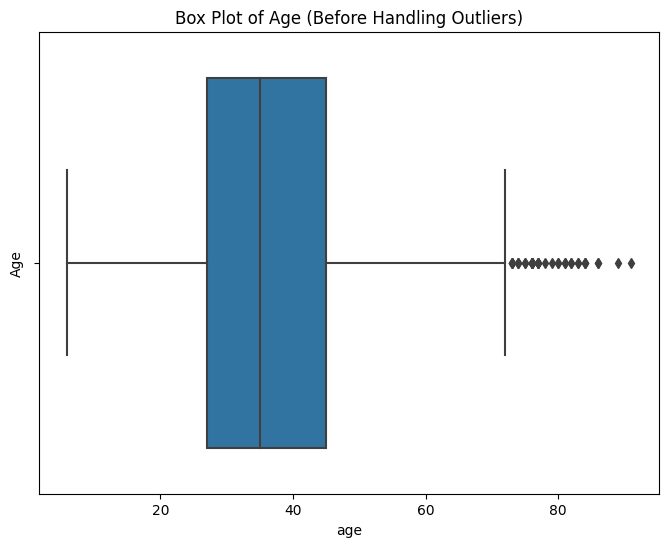

In [11]:
# Display box plot before handling outliers in the 'age' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='age')
plt.title("Box Plot of Age (Before Handling Outliers)")
plt.ylabel("Age")
plt.show()

# TODO: Code to fill: 

# 1. '<<__A__>>' --> Display the box plot before handling outliers in the age column

In [12]:
# Quantile 1 of age column (25 percentage)
Q1 = df['age'].quantile(0.25)
# Quantile 3 of age column (75 percentage)
Q3 = df['age'].quantile(0.75)

In [13]:
# Inter Quartile Range
IQR = Q3 - Q1
IQR

18.0

In [14]:
# Outliers present in upper case
upper_case = Q3 + (1.5*IQR)
print(upper_case)
# Outliers present in lower case
lower_case = Q1 - (1.5*IQR)
print(lower_case)

72.0
0.0


In [15]:
# Loop through the each data record in the age column and append a data to the outliers list variable 
outliers = []
for i in df['age']: 
  if i < lower_case or i > upper_case:  # if any data point in the age column less than lower case or any data point greater than upper case will be an outlier
    outliers.append(i)

In [16]:
print(outliers)

[75, 74, 77, 83, 76, 86, 76, 77, 76, 76, 80, 82, 86, 76, 83, 73, 91, 73, 79, 74, 75, 82, 76, 78, 84, 84, 81, 89, 73, 77, 76, 84, 81, 80, 77, 76, 74, 76, 73]


In [17]:
# Remove the outliers in age column
df['age'] = df['age'].apply(lambda x: x if lower_case <= x <= upper_case else np.nan)

# TODO: Code to fill: 

# 1. '<<__B__>>' --> write the your command to remove outliers outside upper case and lower case

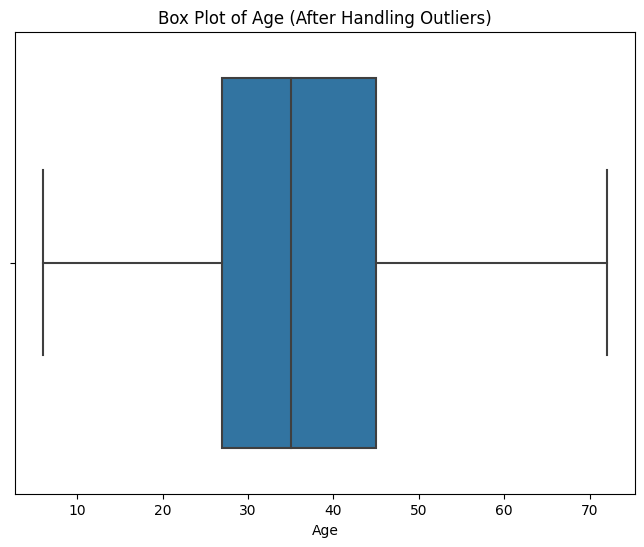

In [18]:
# Display the box plot after handling outliers in the age column
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='age')
plt.title("Box Plot of Age (After Handling Outliers)")
plt.xlabel("Age")
plt.show()

# TODO: Code to fill: 

# 1  '<<__C__>>' --> Display the box plot after handling outliers in the age column

### Question: 3 ( 1 Mark )
Plot a bar graph which tells most repeated weapons used to attack the people  

Text(0.5, 1.0, 'Most Repeated Weapons Used in Attacks')

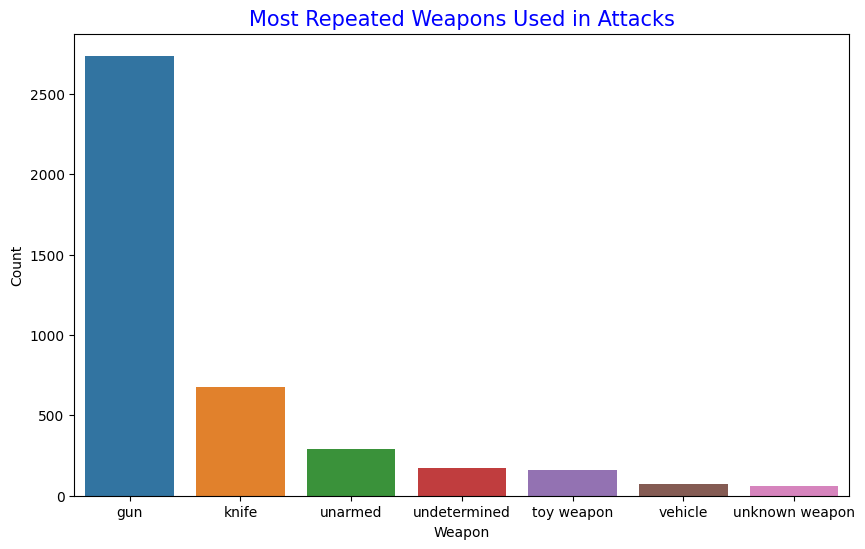

In [19]:
# Get the value count of armed column
armed = df.armed.value_counts()
# set the plot size
plt.figure(figsize=(10, 6))
# Create a bar plot using above variable by filtering upto 7 rows 
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Count')
plt.xlabel('Weapon')
plt.title('Most Repeated Weapons Used in Attacks', fontsize=15, color='blue')

# TODO: Code to fill: 

# 1. '<<__A__>>' --> Set the plot size
# 2. '<<__B__>>' --> set a name for y label
# 3. '<<__C__>>' --> set a name for x label
# 4. '<<__D__>>' --> set a title for the graph with a  fontsize 15 in the colour of blue

### Question: 4 ( 2 Marks )
Generate a bar plot to identify days in which the count of attacks are reported most 

In [20]:
# Create a new columns day, month, year using date column with the help of pandas to_datetime method
df['day'] = pd.to_datetime(df['date']).dt.day
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year

In [21]:
# Display the Dataframe after adding new columns
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_categories,year,day,month
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Senior citizens,2015,2,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Adult,2015,2,1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Youth,2015,3,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Youth,2015,4,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Adult,2015,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4473,4907,Connor Betts,2019-08-04,shot,gun,24.0,M,W,Dayton,OH,True,attack,Not fleeing,False,Youth,2019,4,8
4474,4909,Robert Clay Wilsford Jr.,2019-08-04,shot,gun,65.0,M,W,Hanceville,AL,True,attack,Not fleeing,False,Senior citizens,2019,4,8
4475,4910,TK TK,2019-08-05,shot,undetermined,36.0,M,W,Salt Lake City,UT,False,undetermined,Not fleeing,True,Senior citizens,2019,5,8
4476,4914,James Kirkwood,2019-08-05,shot,knife,49.0,M,B,Memphis,TN,False,attack,Foot,False,Adult,2019,5,8


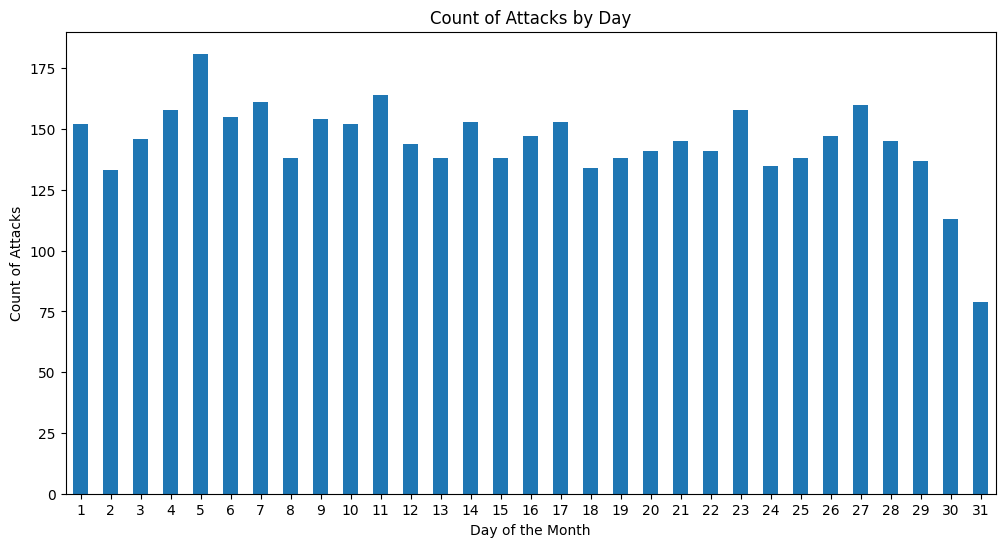

In [22]:
#Plot a bar graph in which days the count of attcks are more
df['day'].value_counts().sort_index().plot.bar(figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count of Attacks')
plt.title('Count of Attacks by Day')
plt.xticks(rotation=0)
plt.show()
# TODO: Code to fill: 

# 1. '<<__A__>>' --> Fill the column name for which you want to plot a bar graph
# 2. '<<__B__>>' --> write your method here to count the values
# 3. '<<__C__>>' --> fill the type of plot
# 4. '<<__D__>>' --> Set plot size (12,6)

### Question: 5 ( 2 Marks )
Display the Top 10 states where the high number of cases recorded 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'CA'),
  Text(1, 0, 'TX'),
  Text(2, 0, 'FL'),
  Text(3, 0, 'AZ'),
  Text(4, 0, 'CO'),
  Text(5, 0, 'GA'),
  Text(6, 0, 'OK'),
  Text(7, 0, 'OH'),
  Text(8, 0, 'WA'),
  Text(9, 0, 'NC')])

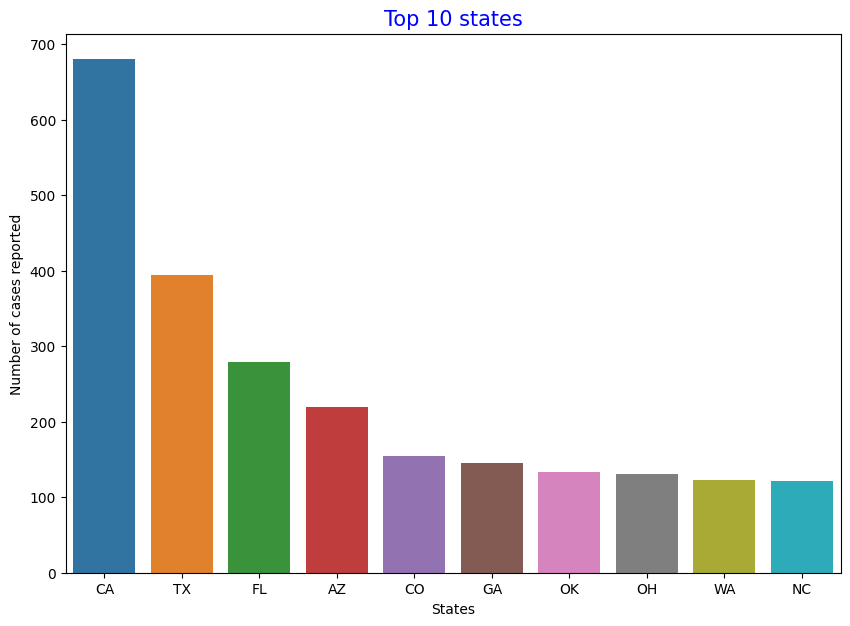

In [23]:
# Write your code here
state = df.state.value_counts().head(10)

# Display the Top 10 states using bar chart
plt.figure(figsize=(10,7))
sns.barplot(x=state.index, y=state.values)
plt.ylabel('Number of cases reported')
plt.xlabel('States')
plt.title('Top 10 states',color = 'blue',fontsize=15)
plt.xticks(rotation=0)



# TODO: Code to fill: 

# 1. '<<__A__>>' --> Fill the column name 
# 2. '<<__B__>>' --> write your method here to count the values
# 3. '<<__C__>>' --> Provide x axis values from state dataframe created in previous step
# 4. '<<__D__>>' --> Provide y axis values from state dataframe created in previous step


### Question: 6 ( 1 Mark )
Drop the features that have more unique string values and not relevant to the model.

In [24]:
# Find the columns with more unique string values
string_columns = []
for column in df.columns:
    if df[column].dtype == 'object' and df[column].nunique() > 10:
        string_columns.append(column)

string_columns

['name', 'date', 'armed', 'city', 'state']

In [25]:
# Find the columns with more unique string values

df.drop(columns=['name', 'date', 'armed', 'city', 'state'],axis=1,inplace=True)

In [26]:
#Display the top 5 rows of dataset after droping the unnecessary features
df.head(5)

# TODO: Code to fill: 

# 1. '<<__A__>>' --> Fill appropriate method for removing features
# 2. '<<__B__>>' --> column names 
# 3. '<<__C__>>' --> Give the axis for removing features
# 3. '<<__D__>>' --> Use the correct method to get top 5 rows of dataset after droping the unnessacary features

,id,manner_of_death,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera,age_categories,year,day,month
0,3,shot,53.0,M,A,True,attack,Not fleeing,False,Senior citizens,2015,2,1
1,4,shot,47.0,M,W,False,attack,Not fleeing,False,Adult,2015,2,1
2,5,shot and Tasered,23.0,M,H,False,other,Not fleeing,False,Youth,2015,3,1
3,8,shot,32.0,M,W,True,attack,Not fleeing,False,Youth,2015,4,1
4,9,shot,39.0,M,H,False,attack,Not fleeing,False,Adult,2015,4,1


### Question: 7 ( 2 Marks )
Create a line plot that shows the number of attacks every year according to race

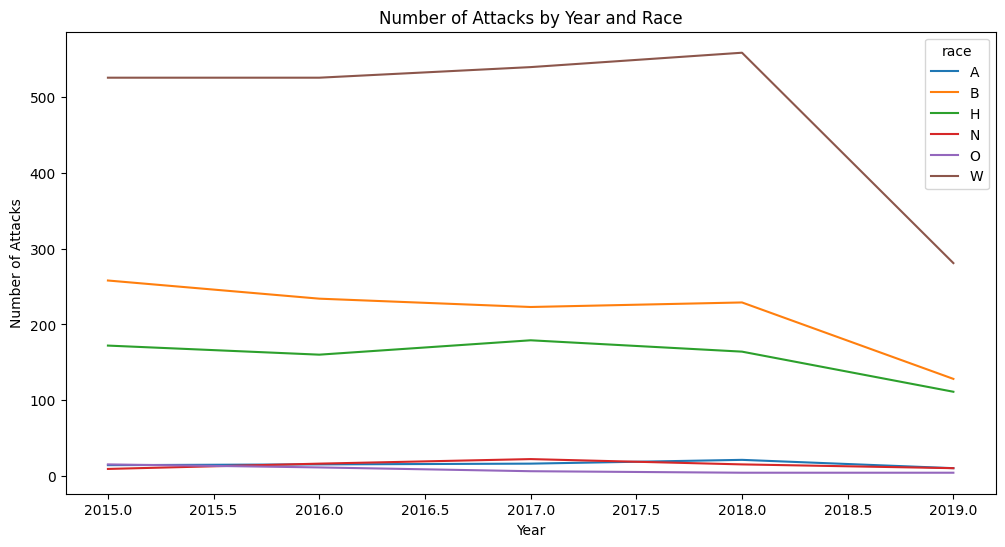

In [27]:
# Write your code here
pd.crosstab(df['year'],df['race']).plot.line(figsize=(12,6))

# Set the labels and title for the plot
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks by Year and Race')

# Display the plot
plt.show()

# TODO: Code to fill: 

# 1. '<<__A__>>' --> Fill the exact column name
# 2. '<<__B__>>' --> Fill the exact column name

In [28]:
!pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
!jupyter nbconvert --to html /content/UOA_assessment_w3.ipynb

## Thank you!